Сверточная нейросетка классификатор рукописных цифр MINST

### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Использую подготовленную базу и шаблон ноутбука нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


In [ ]:
# загрузка датасета MNIST

from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Подключение утилит для to_categorical
from tensorflow.keras import utils 

# Подключение библиотеки для работы с массивами
import numpy as np 

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt 

# Подключение библиотеки для генерации случайных чисел
import random

# Подключение класса для работы с изображением
from PIL import Image

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline 

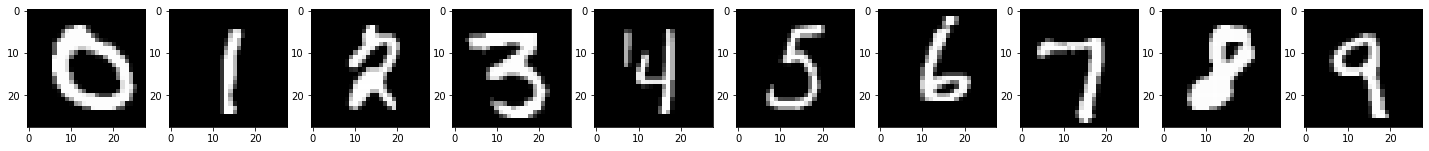

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(1, 10, figsize=(25,3)) # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
  label_indexes = np.where(y_train == i)[0] # получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # выбирает случайный индекс из списка созданного выше
  img = x_train[index] # выбираем из x_train нужное положение
  axs[i].imshow(Image.fromarray(img), cmap='gray') # выводим изображение

plt.show()  

In [ ]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [ ]:
# Ваше решение
# Разделение данных на выборки
from sklearn.model_selection import train_test_split 
x_train, x_val, y_train, y_val = train_test_split(x_train, # ----------------- датасет с изображениям
                                                    y_train, # ----------------- датасет с метками
                                                    test_size = 0.1, # --- процент тестовых значений
                                                    shuffle=True, # ------ перемешивание
                                                    random_state=42) # --- 


In [ ]:
print(x_train.shape,y_train.shape)

(54000, 28, 28, 1) (54000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# Создание модели последовательной архитектуры
model = Sequential()



model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=np.shape(x_train[0])))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()


# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),shuffle=True,batch_size=128,epochs=15,verbose=2)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 flatten_7 (Flatten)         (None, 6272)             

313/313 [==============================] - 7s 21ms/step - loss: 0.0348 - accuracy: 0.9917
[0.03479154035449028, 0.9916999936103821]


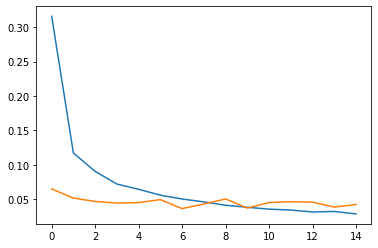

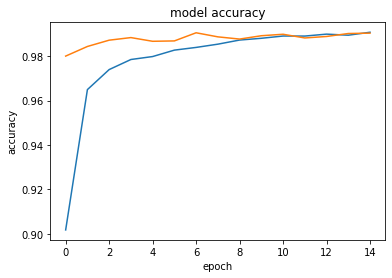

In [ ]:
print(model.evaluate(x_test,y_test))
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='loss train')
pyplot.plot(history.history['val_loss'], label='loss test')
pyplot.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
pyplot.show()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 flatten_8 (Flatten)         (None, 4608)             

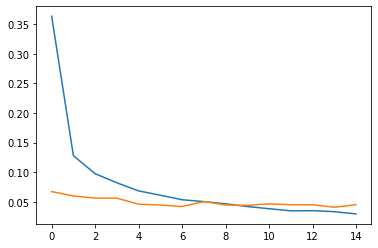

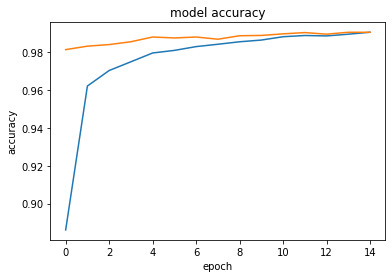

In [ ]:
# Создание модели последовательной архитектуры
model = Sequential()



model.add(Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=np.shape(x_train[0])))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()


# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),shuffle=True,batch_size=128,epochs=15,verbose=2)
print(model.evaluate(x_test,y_test))
pyplot.plot(history.history['loss'], label='loss train')
pyplot.plot(history.history['val_loss'], label='loss test')
pyplot.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
pyplot.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 26, 26, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 dropout_13 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 flatten_9 (Flatten)         (None, 18432)             0         
                                                                 
 dense_27 (Dense)            (None, 100)               1843300   
                                                      

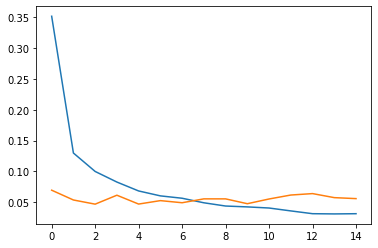

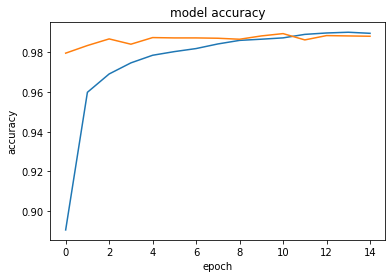

In [ ]:
# Создание модели последовательной архитектуры
model = Sequential()



model.add(Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=np.shape(x_train[0])))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()


# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),shuffle=True,batch_size=128,epochs=15,verbose=2)
print(model.evaluate(x_test,y_test))
pyplot.plot(history.history['loss'], label='loss train')
pyplot.plot(history.history['val_loss'], label='loss test')
pyplot.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
pyplot.show()